Below, I implement a quick and dirty first ML pipeline: I import a subset of the training data, split it into training/test, choose some features and run a random forest on it.

In [1]:
! ls

EDA.ipynb             sample_submission.csv train.csv
destinations.csv      test.csv


Import subset of training data for 1st model pipeline:

In [72]:
#Import libraries:
import numpy as np
import pandas as pd
#import xgboost as xgb
import time
train = pd.read_csv("train.csv", nrows = 10000)
test= pd.read_csv("test.csv", nrows = 1000)

In [73]:
train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [74]:
test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


___
Plot histograms of numerical features:

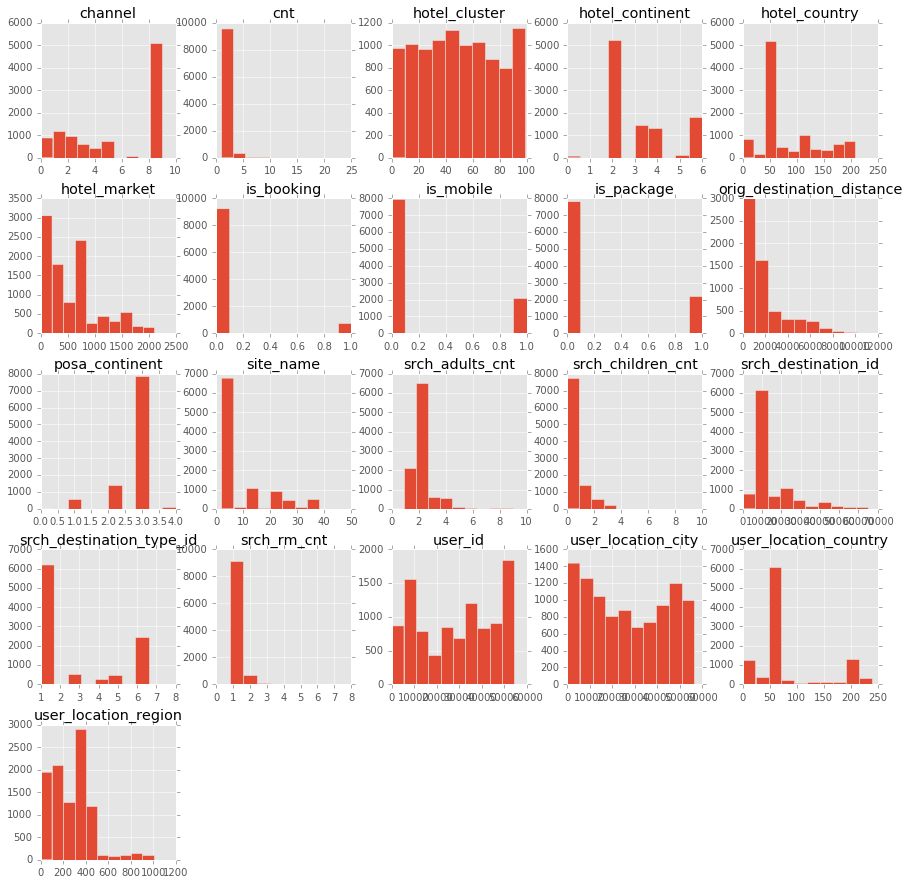

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(train, figsize = [15,15]);

___
Drop non-numerical feautures in order to run a random forest:

In [76]:
drop_list = []
for (train_name, train_series) in train.iteritems():
    print(train_name, train_series.dtype)
    if train_series.dtype == 'object':
        drop_list.append(train_name)
drop_list.append('hotel_cluster')
print(drop_list)

date_time object
site_name int64
posa_continent int64
user_location_country int64
user_location_region int64
user_location_city int64
orig_destination_distance float64
user_id int64
is_mobile int64
is_package int64
channel int64
srch_ci object
srch_co object
srch_adults_cnt int64
srch_children_cnt int64
srch_rm_cnt int64
srch_destination_id int64
srch_destination_type_id int64
is_booking int64
cnt int64
hotel_continent int64
hotel_country int64
hotel_market int64
hotel_cluster int64
['date_time', 'srch_ci', 'srch_co', 'hotel_cluster']


___
Split data into predictor variables (X) and target variable (Y):

In [77]:
X = train.drop(drop_list, axis = 1).fillna(-1)
y = train['hotel_cluster']

Split into test & train sets, run random forest on train set:

In [78]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#See here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train, y_train)
score = forest.score(X_test, y_test)

Print precision:

In [79]:
from sklearn.metrics import precision_score
precision_score(y_test, forest.predict(X_test), average="micro")

0.312

Note: this is NOT the quite the metric of model performance we need to use for the competition but it's close. I tihnk that they're equal when we make only one prediction for each row. **Discuss**. This score would get us in the top ~50% of current leaderboard.